In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17583232140122971119,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2247832372
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9398990329237622850
 physical_device_desc: "device: 0, name: GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL

from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

In [9]:
hyper_dimension = 500
hyper_epochs = 100
hyper_batch_size = 16
hyper_feature_maps = 32
hyper_channels = 1
hyper_mode = 'grayscale'

In [5]:
# Initializing the CNN
classifier = Sequential()

# Convolution & pooling - First convolution layer
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Second convolution layer (same as first layer)
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Third convolution layer
classifier.add(Conv2D(hyper_feature_maps * 2, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = hyper_feature_maps * 2, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0

In [7]:
# Creating training and validation image flows

train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory('train',
                                          target_size = (hyper_dimension,
                                                         hyper_dimension),
                                          batch_size = hyper_batch_size,
                                          class_mode = 'binary',
                                          color_mode = hyper_mode)

val_set = val_gen.flow_from_directory('val',
                                      target_size = (hyper_dimension,
                                                     hyper_dimension),
                                      batch_size = hyper_batch_size,
                                      class_mode = 'binary',
                                      color_mode = hyper_mode)

Found 4193 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


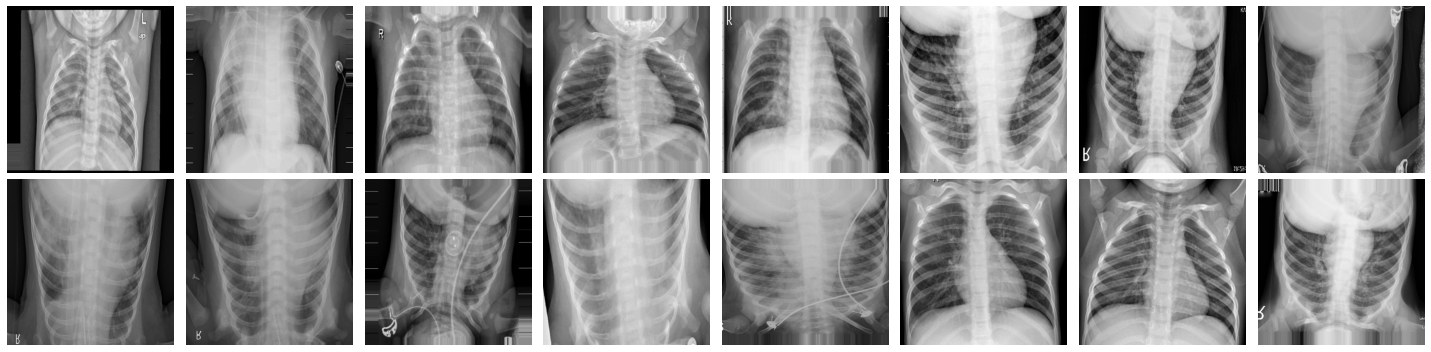

In [8]:
# Visualizing images in the first training set batch 

image_batch = train_set[0][0]

plt.figure(figsize=(20,5))
for i in range(len(image_batch)):
    plt.subplot(2,8,i+1)
    pil_img = array_to_img(image_batch[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Fitting the model
start_time = datetime.now()
results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))
datetime.now() - start_time

Epoch 1/100
263/263 [==============================] - 113s 362ms/step - loss: 0.5680 - accuracy: 0.7380 - val_loss: 0.2043 - val_accuracy: 0.9240
Epoch 2/100
263/263 [==============================] - 89s 339ms/step - loss: 0.2545 - accuracy: 0.8867 - val_loss: 0.1683 - val_accuracy: 0.9346
Epoch 3/100
263/263 [==============================] - 89s 337ms/step - loss: 0.2014 - accuracy: 0.9175 - val_loss: 0.1469 - val_accuracy: 0.9442
Epoch 4/100
263/263 [==============================] - 88s 334ms/step - loss: 0.1632 - accuracy: 0.9399 - val_loss: 0.1804 - val_accuracy: 0.9346
Epoch 5/100
263/263 [==============================] - 90s 341ms/step - loss: 0.1989 - accuracy: 0.9177 - val_loss: 0.1494 - val_accuracy: 0.9433
Epoch 6/100
263/263 [==============================] - 88s 335ms/step - loss: 0.1641 - accuracy: 0.9371 - val_loss: 0.1531 - val_accuracy: 0.9462
Epoch 7/100
263/263 [==============================] - 91s 347ms/step - loss: 0.1602 - accuracy: 0.9392 - val_loss: 0.1316 

datetime.timedelta(seconds=9727, microseconds=175046)

In [11]:
# Creating test image flow

test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory('test',
                                        target_size = (hyper_dimension,
                                                       hyper_dimension),
                                        batch_size = 1,
                                        class_mode = None,
                                        color_mode = hyper_mode,
                                        shuffle=False)

# Making predictions

predictions = classifier.predict_generator(test_set)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 624 images belonging to 2 classes.


In [12]:
# Confusion matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,191,43
Actual Pneumonia,7,383
